## IMPORT LIBRARIES AND DATASET

In [1]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.optimizers import legacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
# Import Cifar-10 dataset
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

# DATA VISUALIZATION

label = [8]


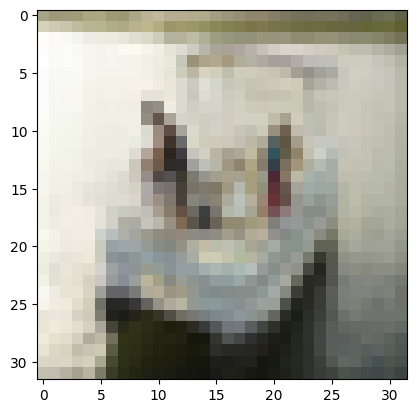

In [7]:
# Select a sample training image and visualize it
i = random.randint(1, len(X_train))
plt.imshow(X_train[i])
print('label = {}'.format(y_train[i]))

label = [9]


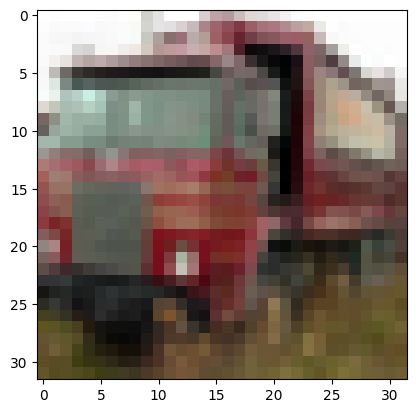

In [8]:
# Select a sample testing image and visualize it
i = random.randint(1, len(X_test))
plt.imshow(X_test[i])
print('label = {}'.format(y_test[i]))

/Users/saismaranjagadam/deep_venv/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


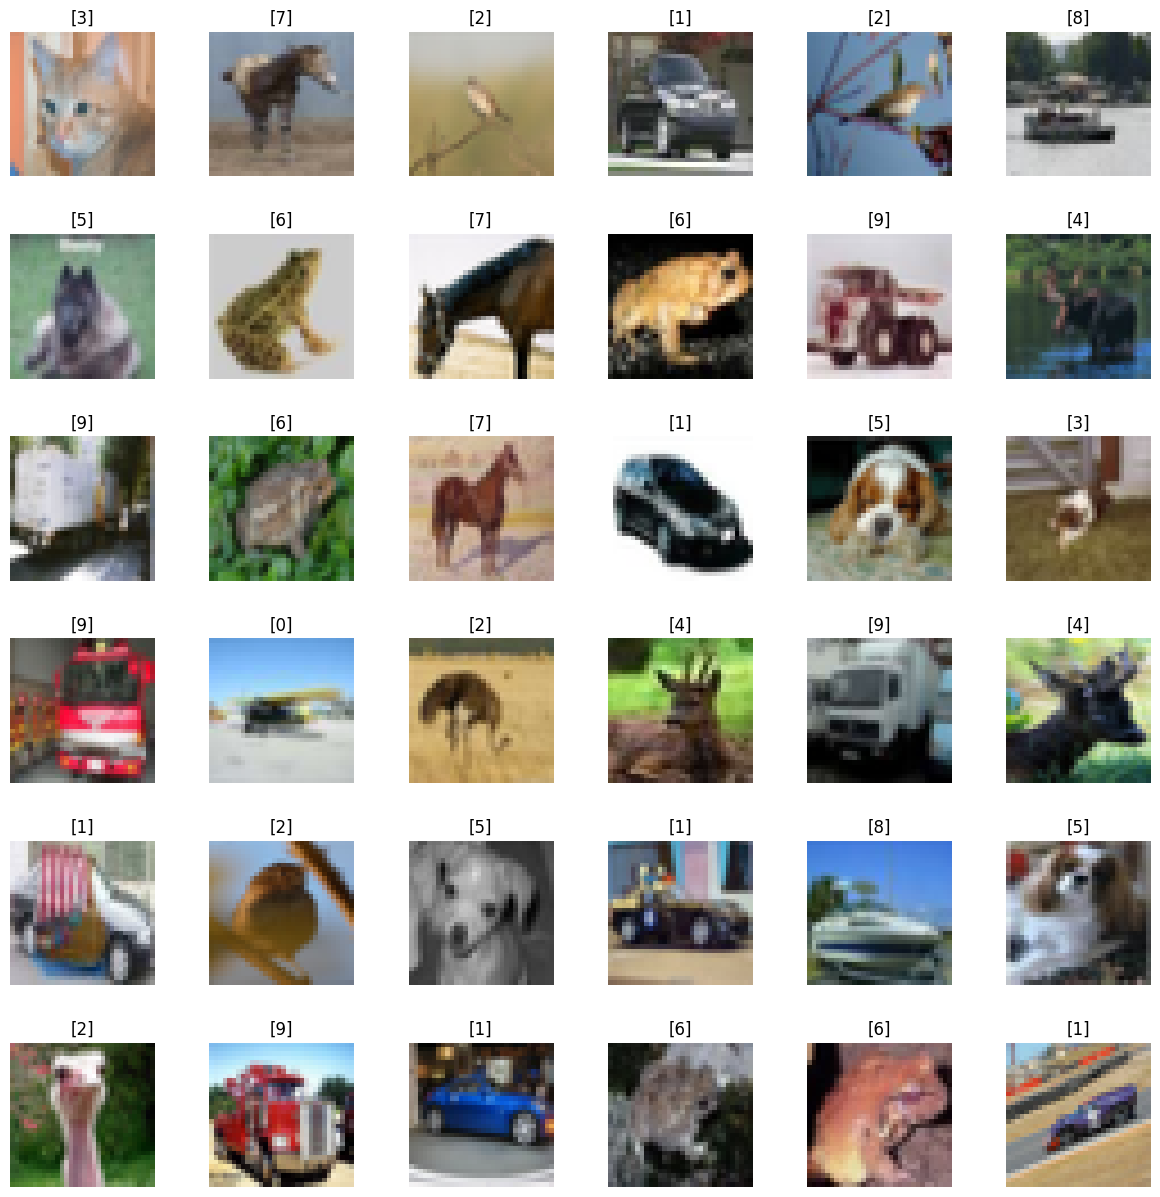

In [9]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# DATA PREPROCESSING FOR TRAINING

In [10]:
n_training

50000

In [11]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
number_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
# Normalize pixels
X_train = X_train/255
X_test = X_test/255


In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
Input_shape = X_train.shape[1:]

In [23]:
Input_shape

(32, 32, 3)

In [24]:
y_train.shape

(50000, 10)

# CNN MODEL USING KERAS

In [25]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

# CNN COMPILE AND TRAIN

In [26]:
cnn.compile(optimizer = legacy.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [27]:
epochs = 100

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)


Epoch 1/100
98/98 [==============================] - 21s 208ms/step - loss: 2.1118 - accuracy: 0.2183
Epoch 2/100
98/98 [==============================] - 20s 209ms/step - loss: 1.8779 - accuracy: 0.3162
Epoch 3/100
98/98 [==============================] - 21s 213ms/step - loss: 1.7704 - accuracy: 0.3560
Epoch 4/100
98/98 [==============================] - 21s 216ms/step - loss: 1.7000 - accuracy: 0.3829
Epoch 5/100
98/98 [==============================] - 22s 221ms/step - loss: 1.6387 - accuracy: 0.4077
Epoch 6/100
98/98 [==============================] - 23s 235ms/step - loss: 1.5866 - accuracy: 0.4224
Epoch 7/100
98/98 [==============================] - 22s 224ms/step - loss: 1.5428 - accuracy: 0.4389
Epoch 8/100
98/98 [==============================] - 22s 225ms/step - loss: 1.5032 - accuracy: 0.4549
Epoch 9/100
98/98 [==============================] - 22s 226ms/step - loss: 1.4642 - accuracy: 0.4686
Epoch 10/100
98/98 [==============================] - 22s 227ms/step - loss: 1.434

# EVALUATE TRAINED MODEL

In [28]:
X_test.shape

(10000, 32, 32, 3)

In [29]:
y_test.shape

(10000, 10)

In [30]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))


313/313 [==============================] - 2s 7ms/step - loss: 0.7080 - accuracy: 0.7641
Test Accuracy: 0.7641000151634216


In [31]:
predicted_classes = cnn.predict(X_test) 
predicted_classes

313/313 [==============================] - 2s 7ms/step


array([[1.4443210e-04, 3.0132104e-04, 6.1335363e-03, ..., 3.9004585e-06,
        5.9341663e-05, 3.8065617e-05],
       [9.4037061e-04, 6.1722263e-03, 4.9175210e-08, ..., 2.2042730e-09,
        9.9244213e-01, 4.4457131e-04],
       [2.4132939e-02, 5.4622568e-02, 3.4719415e-04, ..., 1.8315346e-04,
        8.9919847e-01, 2.0662203e-02],
       ...,
       [5.1502849e-07, 3.8391229e-07, 6.0142489e-04, ..., 6.3255202e-04,
        8.7425587e-07, 4.5169966e-07],
       [1.3559607e-02, 2.3138063e-01, 8.9086384e-02, ..., 1.6799252e-03,
        5.4111919e-05, 4.9275270e-04],
       [4.7224473e-09, 6.1802972e-09, 6.1623327e-06, ..., 9.9722469e-01,
        6.4198029e-09, 3.3587227e-08]], dtype=float32)

In [32]:
predicted_classes = predicted_classes.argmax(1)

In [33]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [34]:
y_test = y_test.argmax(1)

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

Precision: 0.770839076945551
F1 score: 0.7664161115218064


<Axes: >

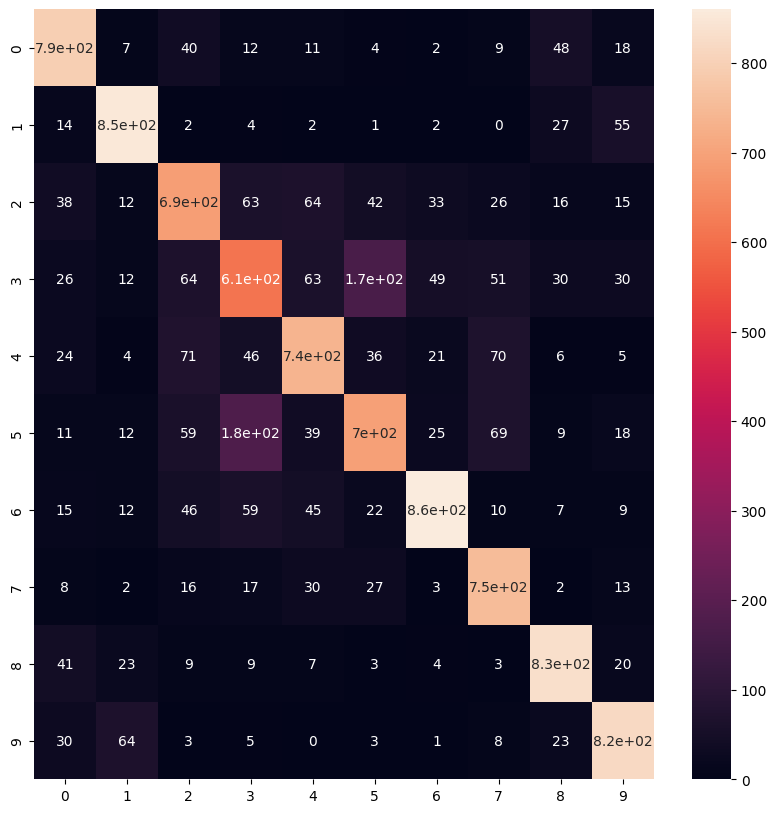

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
precision = precision_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

print("Precision:", precision)
print("F1 score:", f1)

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)